In [35]:
# Import packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from parse import preprocess

In [24]:
df = preprocess("rawfile_blood.csv")


####################################################################
Number of Rows of Dataframe:
1123
Number of Columns of Dataframe:
59

####################################################################
Threshold for number of NULLs in a column: 0.1095
Number of Columns before Parsing for Too Many NULLs in a column:
59
Number of Columns after Parsing for Too Many NULLs in a column:
51

Columns Removed:
B1_b5
B4_a1
B4_a3
B4_a4
B4_a6
B4_b1
B4_b3
B5_a1

####################################################################
Number of Rows before Parsing NULLs in data:
1123
Number of Rows after Parsing NULLs in data:
1007

####################################################################
Number of Columns after dropping A1_2, B1_b4, B2_c3, B4_b2 for inconsistent data types:
47


In [25]:
# Conduct "Low Variance Filter"

# Check for NaN values in features
print("##########################################")
print("% of Nan Values in each Feature")
print(df.isnull().sum()/len(df)*100)
print("##########################################")

# Show Variance
print("Variance between values in each feature")
print(df.var())

##########################################
% of Nan Values in each Feature
mtag         0.0
condition    0.0
A1_1         0.0
A2_1         0.0
A3_1         0.0
B1_a         0.0
B1_a1        0.0
B1_a2        0.0
B1_a3        0.0
B1_a4        0.0
B1_a5        0.0
B1_a6        0.0
B1_b         0.0
B1_b1        0.0
B1_b2        0.0
B1_b3        0.0
B1_c         0.0
B1_d         0.0
B2_a1        0.0
B2_a2        0.0
B2_a3        0.0
B2_a4        0.0
B2_a5        0.0
B2_b1        0.0
B2_b2        0.0
B2_b3        0.0
B2_c1        0.0
B2_c2        0.0
B2_c4        0.0
B2_c5        0.0
B2_c6        0.0
B2_c7        0.0
B2_d1        0.0
B2_d2        0.0
B2_d3        0.0
B2_d4        0.0
B2_d5        0.0
B2_d6        0.0
B2_d7        0.0
B2_d8        0.0
B2_d9        0.0
B3           0.0
B4_a2        0.0
B4_a5        0.0
B5_a2        0.0
B5_a3        0.0
B6           0.0
dtype: float64
##########################################
Variance between values in each feature
A1_1     38284.192365
A2_1  

In [26]:
# Keeping features only with variance >= 10%

# Assign variable to variance
var = df.var()

# Assign variable to features
features = df.columns
feature = []
removed_features = []

columns = list(var.index)

for i in range(0, len(var)):
    if var[i] >= 10:   # Set the threshold as 10%
        feature.append(columns[i])
    else:
        removed_features.append(columns[i])

# Display features that have variance equal to or exceeding 10%
print("##########################################")
print("Features having >= 10 Variance")
print(feature)
print("Total Features: ", end="")
print(len(feature))
# Display removed features
print("##########################################")
print("Features removed")
print(removed_features)
print("Total Features: ", end="")
print(len(removed_features))
print("##########################################")
print("Dataframe after Low Variance Filter:")

temp_df = df[feature]
temp_df['mtag'] = df['mtag'].values
temp_df['condition'] = df['condition'].values

df = temp_df

# Display Dataframe after Low Variance Filter
print(df)

##########################################
Features having >= 10 Variance
['A1_1', 'A2_1', 'A3_1', 'B1_a', 'B1_a3', 'B1_a5', 'B1_b', 'B1_c', 'B2_c2', 'B2_d1', 'B2_d3', 'B2_d5', 'B2_d6', 'B2_d7', 'B2_d8', 'B2_d9', 'B3', 'B5_a2']
Total Features: 18
##########################################
Features removed
['B1_a1', 'B1_a2', 'B1_a4', 'B1_a6', 'B1_b1', 'B1_b2', 'B1_b3', 'B1_d', 'B2_a1', 'B2_a2', 'B2_a3', 'B2_a4', 'B2_a5', 'B2_b1', 'B2_b2', 'B2_b3', 'B2_c1', 'B2_c4', 'B2_c5', 'B2_c6', 'B2_c7', 'B2_d2', 'B2_d4', 'B4_a2', 'B4_a5', 'B5_a3', 'B6']
Total Features: 27
##########################################
Dataframe after Low Variance Filter:
      A1_1  A2_1  A3_1  B1_a  B1_a3  B1_a5  B1_b   B1_c  B2_c2  B2_d1  B2_d3  \
0      196    24  46.5   121     95    324   5.6  255.0     63     73     31   
1      200    23  55.6   142     87    346  10.0  219.0    101     76     34   
2      441    20  76.8   105     90    330   8.4  225.0     63     72     29   
3      265    16  47.2   122     8

<ipython-input-26-8e31768b0c21>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['mtag'] = df['mtag'].values
<ipython-input-26-8e31768b0c21>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['condition'] = df['condition'].values


In [27]:
# Conduct High Correlation Filter

# Conduct mapping for Feature Names
featureName_mapping = {
    "A1_1" : "Vitamin B12 (pmol/L)",
    "A1_2" : "Serum Folate (nmol/L)",
    "A2_1" : "Serum Homocysteine (µmol/L)",
    "A3_1" : "25-hydroxy Vitamin D (nmol/L)",
    "B1_a" : "Haemoglobin (g/L)",
    "B1_a1" : "RBC (/L)",
    "B1_a2" : "PCV (L/L)",
    "B1_a3" : "MCV (fL)",
    "B1_a4" : "MCH (pg)",
    "B1_a5" : "MCHC (g/L)",
    "B1_a6" : "RDW (%)",
    "B1_b" : "White Cell Count (/L)",
    "B1_b1" : "Neutrophils (/L)",
    "B1_b2" : "Lymphocytes (/L)",
    "B1_b3" : "Monocytes (/L)",
    "B1_b4" : "Eosinophils (/L)",
    "B1_b5" : "Basophils (/L)",
    "B1_c" : "Platelets (/L)",
    "B1_d" : "Glucose (mmol/L)",
    "B2_a1" : "Total Cholesterol (mmol/L)",
    "B2_a2" : "Triglyceride (mmol/L)",
    "B2_a3" : "HDL Cholesterol (mmol/L)",
    "B2_a4" : "LDL Cholesterol (mmol/L)",
    "B2_a5" : "Total Cholesterol/HDL Ratio",
    "B2_b1" : "Sodium (mmol/L)",
    "B2_b2" : "Potassium (mmol/L)",
    "B2_b3" : "Chloride (mmol/L)",
    "B2_c1" : 'Urea (mmol/L)',
    "B2_c2" : "Creatinine (umol/L)",
    "B2_c3" : "eGFR (mL/min/1.73m2)",
    "B2_c4" : "Uric Acid (mmol/L)",
    "B2_c5" : "Calcium (mmol/L)",
    "B2_c6" : "Corrected Calcium (mmol/L)",
    "B2_c7" : "Phosphate (mmol/L)",
    "B2_d1" : "Total Protein (g/L)",
    "B2_d2" : "Albumin (g/L)",
    "B2_d3" : "Globulin (g/L)",
    "B2_d4" : "Albumin/Globulin ratio",
    "B2_d5" : "Alkaline Phosphatase (U/L)",
    "B2_d6" : "Total Bilirubin (µmol/L)",
    "B2_d7" : "GGT",
    "B2_d8" : "AST",
    "B2_d9" : "ALT",
    "B3" : "C-Reactive Protein",
    "B4_a1" : "Protein",
    "B4_a2" : "pH",
    "B4_a3" : "Glucose",
    "B4_a4" : "Ketones",
    "B4_a5" : "S.G.",
    "B4_a6" : "Blood",
    "B4_b1" : "Leucocytes (/L)",
    "B4_b2" : "Erythrocytes (/L)",
    "B4_b3" : "Epithelial Cells",
    "B5_a1" : "Free Thyroxine (FT4) (pmol/L)",
    "B5_a2" : "Thyroid Stimulating Hormone (mIU/L)",
    "B5_a3" : "Free Tri-iodothyronine (FT3) (pmol/L)",
    "B6" : "HbA1c"
}

# Remove 'mtag' and label 'condition' to keep only features
df_temp = df.drop(['mtag', 'condition'], 1)

# Show correlation between features
corr = df_temp.corr()

print("#################################################################")
print("Feature Correlation Table:\n")
print(corr)

# Export correlation data to CSV
corr.to_csv("featureCorrelation.csv")

highCorrValue = []
highCorrelationPairs = []
new_tuple = []

for i in range(0, len(corr)):
    for j in range(0, len(corr.columns)):
        if (corr.iat[i,j] != 1.0) and (corr.iat[i,j] >= 0.5):
            highCorrValue.append(corr.iat[i,j])
            highCorrelationPairs.append((corr.columns[i],corr.index[j]))

# Show High Correlation Pairs with respective Correlation value
highCorrelationPairs = list(set([tuple(sorted(i)) for i in highCorrelationPairs]))
highCorrelationPairs = sorted(highCorrelationPairs)
highCorrValue = list(dict.fromkeys(highCorrValue))

print("\n#################################################################")
print("High Correlation Pairs with Correlation Values:")
for i in range(0, len(highCorrValue)):
    print(highCorrelationPairs[i][0], "and", highCorrelationPairs[i][1], ":", highCorrValue[i])
print("\nHigh Correlation Pairs with Correlation Values:")

df_dummy = pd.DataFrame(highCorrelationPairs)

df_dummy[0] = df_dummy[0].map(featureName_mapping)
df_dummy[1] = df_dummy[1].map(featureName_mapping)

for i in range(0, len(df_dummy)):
    new_tuple.append((df_dummy.iat[i,0], df_dummy.iat[i,1]))

names = new_tuple

for i in range(0, len(highCorrValue)):
    print(names[i][0], "and", names[i][1], ":", highCorrValue[i])

#################################################################
Feature Correlation Table:

           A1_1      A2_1      A3_1      B1_a     B1_a3     B1_a5      B1_b  \
A1_1   1.000000 -0.284103  0.062753 -0.059712  0.036896 -0.026018  0.026430   
A2_1  -0.284103  1.000000 -0.033859 -0.012390  0.017413  0.053191  0.104268   
A3_1   0.062753 -0.033859  1.000000  0.041232  0.095420  0.093920 -0.010307   
B1_a  -0.059712 -0.012390  0.041232  1.000000  0.126687  0.207737 -0.039956   
B1_a3  0.036896  0.017413  0.095420  0.126687  1.000000  0.107533  0.023018   
B1_a5 -0.026018  0.053191  0.093920  0.207737  0.107533  1.000000  0.023185   
B1_b   0.026430  0.104268 -0.010307 -0.039956  0.023018  0.023185  1.000000   
B1_c   0.030533  0.015486 -0.115349 -0.109395 -0.067699 -0.169209  0.138688   
B2_c2 -0.024759  0.446663  0.067132 -0.051081  0.041217  0.046087  0.073744   
B2_d1  0.010351  0.103980 -0.076349  0.053077 -0.041204  0.066071  0.011854   
B2_d3  0.003759  0.122693 -0.112755 -

In [28]:
# Drop one of the feature pairs having high correlation
dropping_list = ['B2_d1', 'B2_d8']

df = df.drop(dropping_list, axis=1)

# Display final Dataframe
print(df)

      A1_1  A2_1  A3_1  B1_a  B1_a3  B1_a5  B1_b   B1_c  B2_c2  B2_d3  B2_d5  \
0      196    24  46.5   121     95    324   5.6  255.0     63     31     67   
1      200    23  55.6   142     87    346  10.0  219.0    101     34     66   
2      441    20  76.8   105     90    330   8.4  225.0     63     29     53   
3      265    16  47.2   122     86    313   7.7  312.0     77     32     70   
4      425    14  31.3   124     85    329   6.6  295.0     64     30     62   
...    ...   ...   ...   ...    ...    ...   ...    ...    ...    ...    ...   
1002   220    19  67.5   138     91    325   6.3  291.0     45     36     60   
1003   334    18  51.0   139     91    330   5.3  235.0     65     31     51   
1004   418    17  61.0   122     90    324   4.3  191.0     63     30     44   
1005   393    18  43.1   136     94    316   5.5  298.0     52     32     49   
1006   371    24  55.9   127     90    320   5.5  301.0     59     30     70   

      B2_d6  B2_d7  B2_d9   B3  B5_a2  

In [29]:
# Conduct Random Forest to do feature selection

# Specify features and labels
y = df['condition']
x = df.drop(['mtag', 'condition'], axis=1)

# Display features and labels
print(x, y)

# Display shape of features and labels
print("\nShape of Features:")
print(x.shape)
print("\nShape of Labels:")
print(y.shape)

# Data Dictionary:
# frail -> 0
# frail_mci -> 1
# mci -> 2
# prefrail_mci -> 3
# prefrail -> 4
# robust -> 5

# Conduct label mapping for conditions
label_mapping = {
    'frail' : 0,
    'frail_mci' : 1,
    'mci' : 2,
    'prefrail_mci' : 3,
    'prefrail' : 4,
    'robust' : 5
}

y = y.map(label_mapping)

# Display label
print(y)

# Create Random Forest Classifier Model
model = RandomForestClassifier(random_state=1)

# Build the model
model.fit(x, y)

      A1_1  A2_1  A3_1  B1_a  B1_a3  B1_a5  B1_b   B1_c  B2_c2  B2_d3  B2_d5  \
0      196    24  46.5   121     95    324   5.6  255.0     63     31     67   
1      200    23  55.6   142     87    346  10.0  219.0    101     34     66   
2      441    20  76.8   105     90    330   8.4  225.0     63     29     53   
3      265    16  47.2   122     86    313   7.7  312.0     77     32     70   
4      425    14  31.3   124     85    329   6.6  295.0     64     30     62   
...    ...   ...   ...   ...    ...    ...   ...    ...    ...    ...    ...   
1002   220    19  67.5   138     91    325   6.3  291.0     45     36     60   
1003   334    18  51.0   139     91    330   5.3  235.0     65     31     51   
1004   418    17  61.0   122     90    324   4.3  191.0     63     30     44   
1005   393    18  43.1   136     94    316   5.5  298.0     52     32     49   
1006   371    24  55.9   127     90    320   5.5  301.0     59     30     70   

      B2_d6  B2_d7  B2_d9   B3  B5_a2  

RandomForestClassifier(random_state=1)

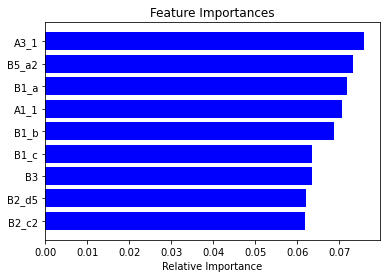

In [30]:
features = x.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [31]:
# Allow model to identify which features are most important
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))

sel.fit(x, y)
selected_feat= x.columns[(sel.get_support())]
print(selected_feat)
print(len(selected_feat))

Index(['A1_1', 'A3_1', 'B1_a', 'B1_b', 'B1_c', 'B2_c2', 'B5_a2'], dtype='object')
7


In [32]:
# Implement classification with these models
df = preprocess("rawfile_blood.csv")

df_new = df[selected_feat]
df_new['mtag'] = df['mtag'].values
df_new['condition'] = df['condition'].values

df = df_new

print(df)


####################################################################
Number of Rows of Dataframe:
1123
Number of Columns of Dataframe:
59

####################################################################
Threshold for number of NULLs in a column: 0.1095
Number of Columns before Parsing for Too Many NULLs in a column:
59
Number of Columns after Parsing for Too Many NULLs in a column:
51

Columns Removed:
B1_b5
B4_a1
B4_a3
B4_a4
B4_a6
B4_b1
B4_b3
B5_a1

####################################################################
Number of Rows before Parsing NULLs in data:
1123
Number of Rows after Parsing NULLs in data:
1007

####################################################################
Number of Columns after dropping A1_2, B1_b4, B2_c3, B4_b2 for inconsistent data types:
47
      A1_1  A3_1  B1_a  B1_b   B1_c  B2_c2  B5_a2     mtag condition
0      196  46.5   121   5.6  255.0     63   1.14  ME02646     frail
1      200  55.6   142  10.0  219.0    101   3.25  ME03109     frail
2  

<ipython-input-32-ccd84321172f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['mtag'] = df['mtag'].values
<ipython-input-32-ccd84321172f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['condition'] = df['condition'].values


In [33]:
#==================================================
# RUN SVM LINEAR CLASSIFICATION (WITH 6 FEATURES) //
#==================================================

# Specify features and labels
y = df['condition']
x = df.drop(['mtag', 'condition'], axis=1)

# Display features and labels
print(x, y)

# Display shape of features and labels
print("\nShape of Features:")
print(x.shape)
print("\nShape of Labels:")
print(y.shape)

# Data Dictionary:
# frail -> 0
# frail_mci -> 1
# mci -> 2
# prefrail_mci -> 3
# prefrail -> 4
# robust -> 5

# Conduct label mapping for conditions
label_mapping = {
    'frail' : 0,
    'frail_mci' : 1,
    'mci' : 2,
    'prefrail_mci' : 3,
    'prefrail' : 4,
    'robust' : 5
}

y = y.map(label_mapping)
y = np.array(y)

# Display label
print(y)

# Display shape of label
print(y.shape)

# Conduct train-test split on dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Display x_train, x_test, y_train, y_test
print("\nX Train:")
print(x_train)
print("\nX Test:")
print(x_test)
print("\nY Train:")
print(y_train)
print("\nY Test:")
print(y_test)

# Display shape of train and test sets
print("\nShape of X Train:")
print(x_train.shape)
print("\nShape of X Test:")
print(x_test.shape)
print("\nShape of Y Train:")
print(y_train.shape)
print("\nShape of Y Test:")
print(y_test.shape)

# Create linear SVM model
model = svm.SVC(kernel='linear')

# Train the model
model.fit(x_train, y_train)

# Make predictions
predictions = model.predict(x_test)

# Measure accuracy
acc = accuracy_score(y_test, predictions)

# Print predictions, actual, and accuracy score
print("Predictions:", predictions)
print("Actual:", y_test)
print("Accuracy:", acc)

      A1_1  A3_1  B1_a  B1_b   B1_c  B2_c2  B5_a2
0      196  46.5   121   5.6  255.0     63   1.14
1      200  55.6   142  10.0  219.0    101   3.25
2      441  76.8   105   8.4  225.0     63   2.14
3      265  47.2   122   7.7  312.0     77   1.06
4      425  31.3   124   6.6  295.0     64   1.95
...    ...   ...   ...   ...    ...    ...    ...
1002   220  67.5   138   6.3  291.0     45   1.29
1003   334  51.0   139   5.3  235.0     65   1.88
1004   418  61.0   122   4.3  191.0     63   3.58
1005   393  43.1   136   5.5  298.0     52   0.92
1006   371  55.9   127   5.5  301.0     59   2.45

[1007 rows x 7 columns] 0        frail
1        frail
2        frail
3        frail
4        frail
         ...  
1002    robust
1003    robust
1004    robust
1005    robust
1006    robust
Name: condition, Length: 1007, dtype: object

Shape of Features:
(1007, 7)

Shape of Labels:
(1007,)
[0 0 0 ... 5 5 5]
(1007,)

X Train:
     A1_1  A3_1  B1_a  B1_b   B1_c  B2_c2  B5_a2
508   240  37.9   172   

In [34]:
confusion_matrix(y_test, predictions)

array([[ 0,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  3,  0, 13],
       [ 0,  0,  0,  1,  0, 29],
       [ 0,  0,  0,  7,  0, 41],
       [ 0,  0,  0,  1,  0, 35],
       [ 0,  0,  0,  4,  0, 66]], dtype=int64)

In [36]:
f1_score(y_test, predictions, average='micro')

0.3613861386138614